## Introduction
This is the Data Analysis of the imported dataset based on the MAl website 

## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made.

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 


There is 1 csv file in the current version of the dataset:


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/Project LEVI.csv


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: /kaggle/input/Project LEVI.csv

In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Project LEVI.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/kaggle/input/Project LEVI.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Project LEVI.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 300 rows and 7 columns


Let's take a quick look at what the data looks like:

In [7]:
df1.head(5)

,Unnamed: 0,Rankings,Title,Episodes Aired,Duration,Ratings,Members Watched
0,0,1,Fullmetal Alchemist: Brotherhood,64.0,Apr 2009 - Jul 2010,9.24,1444836
1,1,2,Kimi no Na wa.,1.0,Aug 2016 - Aug 2016,9.13,982269
2,2,3,Steins;Gate,24.0,Apr 2011 - Sep 2011,9.13,1206115
3,3,4,Gintama°,51.0,Apr 2015 - Mar 2016,9.12,250826
4,4,5,Hunter x Hunter (2011),148.0,Oct 2011 - Sep 2014,9.12,911153


Distribution graphs (histogram/bar graph) of sampled columns:

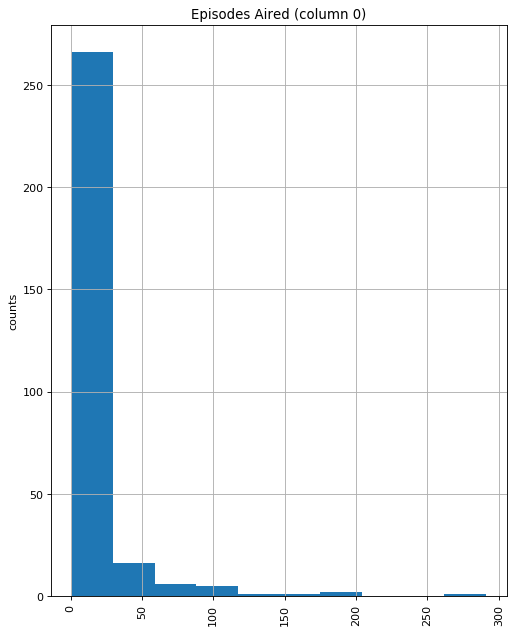

In [8]:
plotPerColumnDistribution(df1, 10, 5)

Correlation matrix:

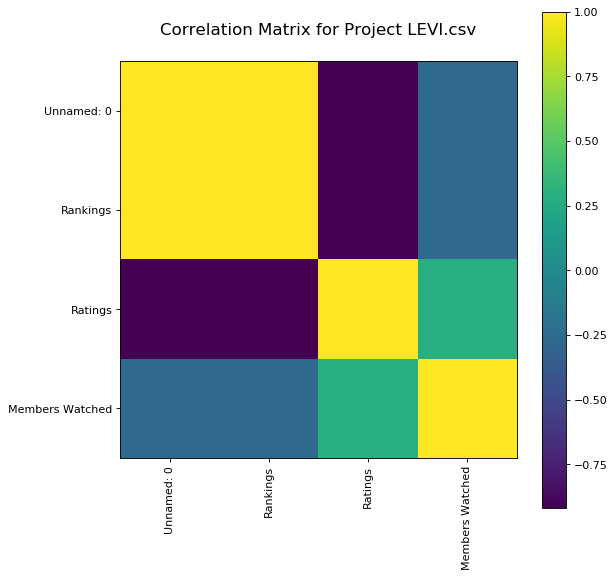

In [9]:
plotCorrelationMatrix(df1, 8)

Scatter and density plots:

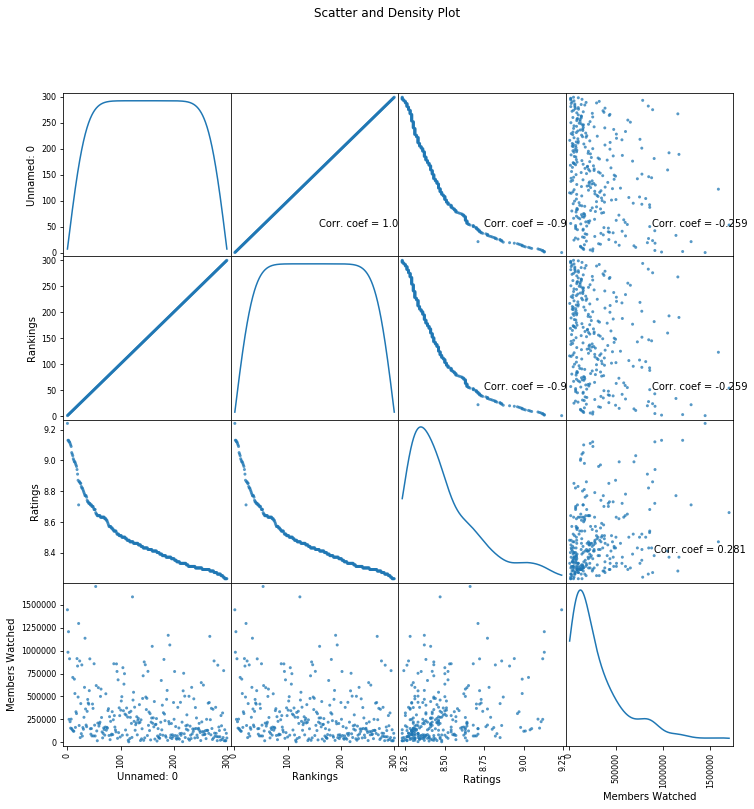

In [10]:
plotScatterMatrix(df1, 12, 10)

In [11]:
df1[df1['Duration'].str.contains('Currently Ongoing')].count()

Unnamed: 0         10
Rankings           10
Title              10
Episodes Aired      8
Duration           10
Ratings            10
Members Watched    10
dtype: int64

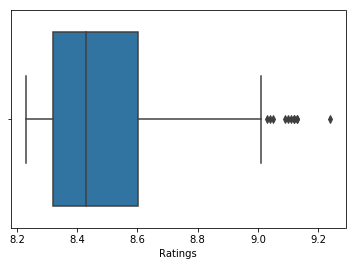

In [12]:
ax = sns.boxplot(x="Ratings", data=df1)

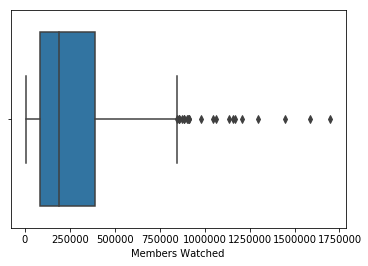

In [13]:
ax = sns.boxplot(x="Members Watched", data=df1)

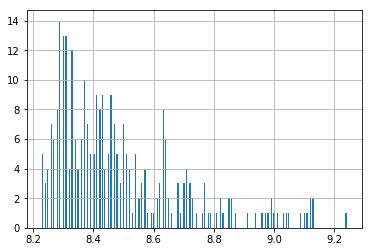

In [14]:
df1['Ratings'].hist(bins=250)

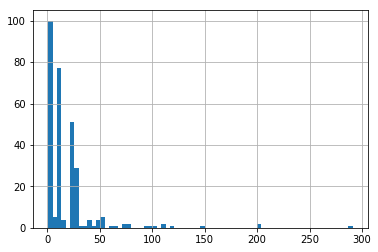

In [15]:
df1['Episodes Aired'].hist(bins=70)

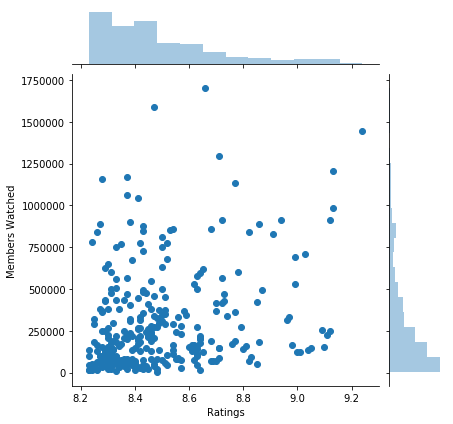

In [16]:
sns.jointplot(x="Ratings", y="Members Watched", data=df1);

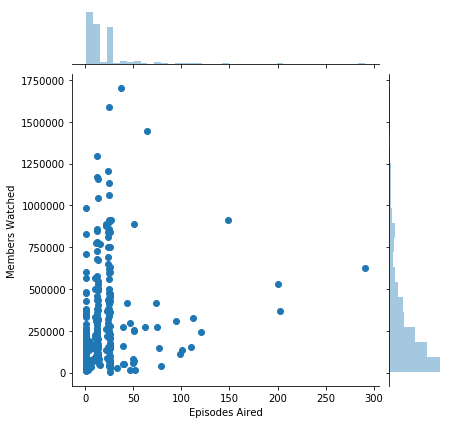

In [17]:
sns.jointplot(x="Episodes Aired", y="Members Watched", data=df1);

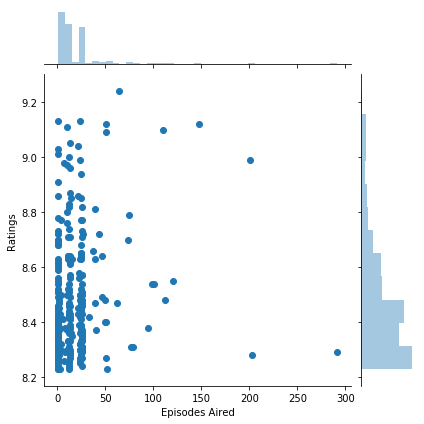

In [18]:
sns.jointplot(x="Episodes Aired", y="Ratings", data=df1);

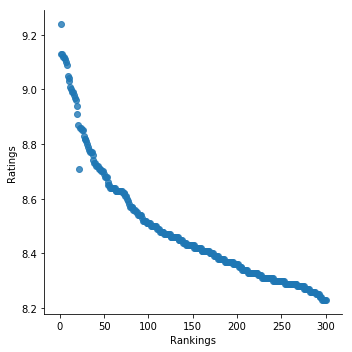

In [19]:
sns.lmplot( 'Rankings','Ratings', data=df1, fit_reg=False)

## Conclusion

- Minimum rating for an anime is 8.23 (since only top 300 are taken into the dataset)
- Maximum rating for an anime is 9.24
- Mean rating for an average anime is 8.48
- Increase in the ratings decreases the number of anime
- Increase in the episodes decreases the number of anime
- Between 8.2-8.6 ratings  the density of the members watched is very high
- After 8.6 the density is rapidly decreased
- Death note is the most popular anime with 1701606 members watched
- Full metal alchemist brotherhood is the top rated anime with 9.24 rating
- Between 0-50 Episodes the ratings are dense and after 50 the ratings have fallen apart
- Ratings and Rankings are inversely proportional to each other
- **The popularity of an anime is based on all these factors i.e the number of episodes aired,prior ratings and of course the story**
- **although there are some exceptions where the episodes aired are not a factor of an anime popularity, according to these 300 anime most of the people prefer an anime which has:**
 1) Less than 100 episodes 
 2) have a good prior rating 
 
 This is just an analysis,Thank you :) 
